# Laboratorio 8
- Javier Ramírez 21600
- Mario Cristales 21631

In [11]:
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [3]:
file = "reviews_data.txt"

text_content = ""
with open(file, 'r', encoding='latin-1') as file:
    text_content = file.read()

print(text_content[:100])


Oct 12 2009 	Nice trendy hotel location not too bad.	I stayed in this hotel for one night. As this i


In [4]:
""" documents = [
    "The quick brown fox jumps over the lazy dog.",
    "Artificial intelligence is transforming the world rapidly.",
    "Python is an incredibly versatile programming language.",
    "She sells seashells by the seashore on a sunny day.",
    "Data science involves statistics, coding, and domain expertise.",
    "In the heart of the forest, the birds sing their morning song.",
    "Space exploration has always captured the imagination of humanity.",
    "The coffee machine broke just before the morning rush.",
    "Quantum computing could revolutionize cryptography and data security.",
    "A warm cup of tea can be soothing on a cold winter evening."
] """

' documents = [\n    "The quick brown fox jumps over the lazy dog.",\n    "Artificial intelligence is transforming the world rapidly.",\n    "Python is an incredibly versatile programming language.",\n    "She sells seashells by the seashore on a sunny day.",\n    "Data science involves statistics, coding, and domain expertise.",\n    "In the heart of the forest, the birds sing their morning song.",\n    "Space exploration has always captured the imagination of humanity.",\n    "The coffee machine broke just before the morning rush.",\n    "Quantum computing could revolutionize cryptography and data security.",\n    "A warm cup of tea can be soothing on a cold winter evening."\n] '

In [5]:
tokenized_documents = [line.lower().split() for line in text_content.split('\n') if line]
print(tokenized_documents[:2])

[['oct', '12', '2009', 'nice', 'trendy', 'hotel', 'location', 'not', 'too', 'bad.', 'i', 'stayed', 'in', 'this', 'hotel', 'for', 'one', 'night.', 'as', 'this', 'is', 'a', 'fairly', 'new', 'place', 'some', 'of', 'the', 'taxi', 'drivers', 'did', 'not', 'know', 'where', 'it', 'was', 'and/or', 'did', 'not', 'want', 'to', 'drive', 'there.', 'once', 'i', 'have', 'eventually', 'arrived', 'at', 'the', 'hotel,', 'i', 'was', 'very', 'pleasantly', 'surprised', 'with', 'the', 'decor', 'of', 'the', 'lobby/ground', 'floor', 'area.', 'it', 'was', 'very', 'stylish', 'and', 'modern.', 'i', 'found', 'the', "reception's", 'staff', 'geeting', 'me', 'with', "'aloha'", 'a', 'bit', 'out', 'of', 'place,', 'but', 'i', 'guess', 'they', 'are', 'briefed', 'to', 'say', 'that', 'to', 'keep', 'up', 'the', 'coroporate', 'image.as', 'i', 'have', 'a', 'starwood', 'preferred', 'guest', 'member,', 'i', 'was', 'given', 'a', 'small', 'gift', 'upon-check', 'in.', 'it', 'was', 'only', 'a', 'couple', 'of', 'fridge', 'magnets'

In [6]:
model = Word2Vec(
    tokenized_documents,
    vector_size=100,
    window=5,
    min_count=1,
    workers=4
)

model.train(tokenized_documents, total_examples=len(tokenized_documents), epochs=15)

(12720358, 17006835)

In [7]:
common_words = ["street", "good", "dog", "mother", "bed"]

for word in common_words:
    similar = model.wv.most_similar(word, topn=10)
    print(f"Words similar to '{word}':")
    for w in similar:
        print(f"\t'{w[0]}': {w[1]}")

Words similar to 'street':
	'street,': 0.8327663540840149
	'road': 0.8247462511062622
	'street.': 0.7654195427894592
	'road.': 0.6796256303787231
	'road,': 0.6760079264640808
	'avenue': 0.6590998768806458
	'mall': 0.630094051361084
	'hall': 0.6260839700698853
	'overpasses': 0.6137421727180481
	'intersection': 0.6131176352500916
Words similar to 'good':
	'decent': 0.7761094570159912
	'great': 0.7004434466362
	'good,': 0.671953558921814
	'nice': 0.6524866223335266
	'excellent': 0.6461021304130554
	'reasonable': 0.6417801380157471
	'good.': 0.5894030928611755
	'poor': 0.5699455142021179
	'fine': 0.5666470527648926
	'convenient': 0.5586841106414795
Words similar to 'dog':
	'planet&quot;anyway,': 0.7023204565048218
	'eyes,': 0.6926904916763306
	'whichever': 0.6831695437431335
	'plced': 0.6733541488647461
	'clothes!': 0.6636534929275513
	'they'll': 0.6629827618598938
	'satisiate': 0.6553855538368225
	'pajamas,': 0.6550856828689575
	'hearts': 0.6544532775878906
	'oj,': 0.6537455320358276
Word

In [10]:
word_vectors = model.wv
words = list(word_vectors.key_to_index)
words = [word for word in words if word.isalpha()]
vectors = [word_vectors[word] for word in words]
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

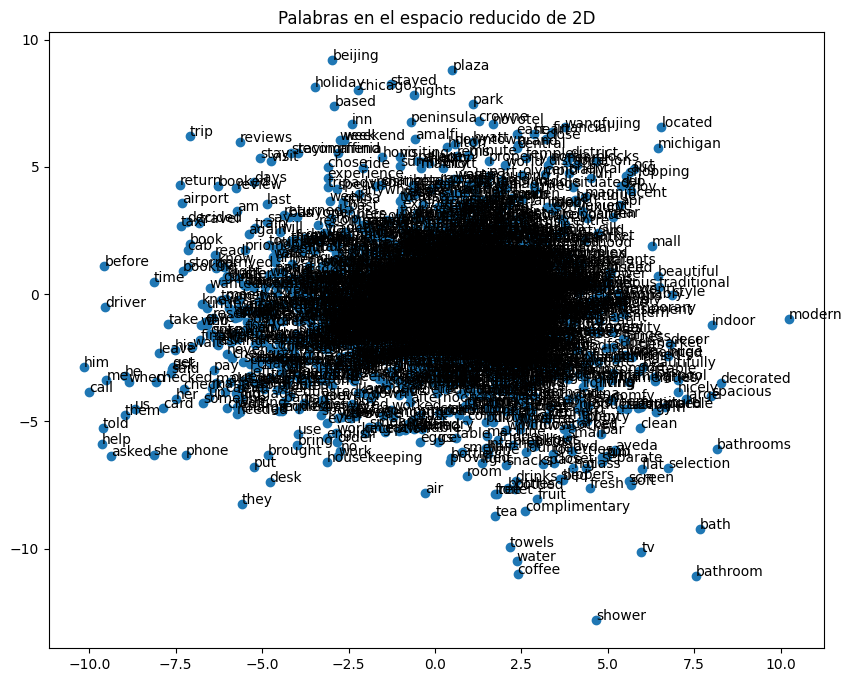

In [12]:
plt.figure(figsize=(10, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]))

plt.title("Palabras en el espacio reducido de 2D")
plt.show()

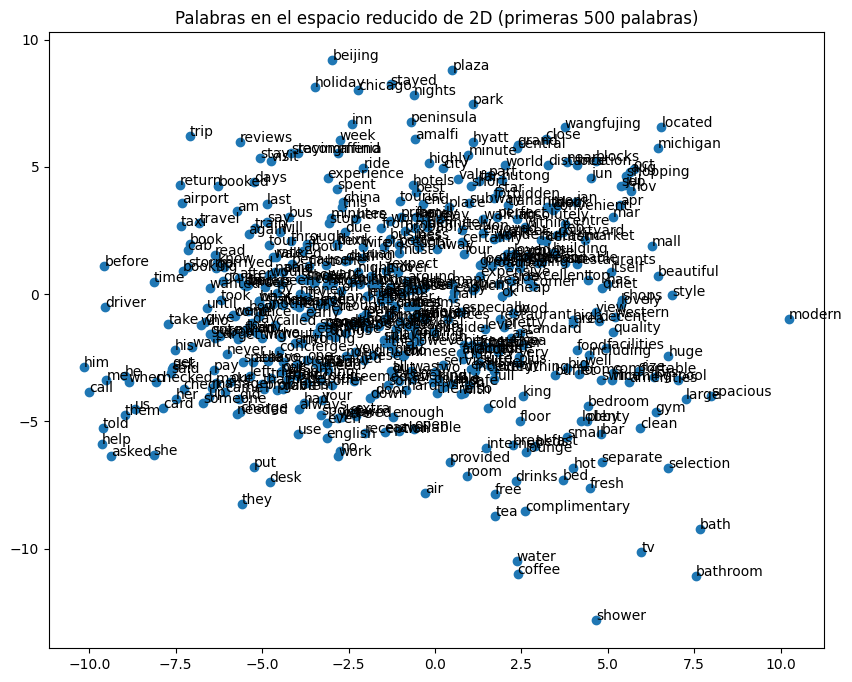

In [14]:
limit = 500
plt.figure(figsize=(10, 8))
plt.scatter(vectors_2d[:limit, 0], vectors_2d[:limit, 1])

for i, word in enumerate(words[:limit]):
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]))

plt.title("Palabras en el espacio reducido de 2D (primeras 500 palabras)")
plt.show()